#MSc in Data Science, AUEB
#Numerical Optimization and Large Scale Linear Algebra, Assignment 1
##Vasileios Ilias Drouzas
##Student ID: f3352301

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
xls = pd.ExcelFile('housedata.xls')
df1 = pd.read_excel(xls, 'Sheet1')
np.random.seed(42)

In [ ]:
df1

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502
...,...,...,...,...,...,...
769,3,4,3,2280,0,232425;
770,3,3,2,1477,0,234000;
771,2,3,2,1216,0,235000;
772,3,4,2,1685,0,235301;


In [ ]:
df1.describe()

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise"
count,774.000000,774.000000,774.000000,774.000000,774.000000
mean,2.583979,3.240310,1.947028,1583.179587,0.050388
std,0.701174,0.819635,0.634119,636.594058,0.218885
min,1.000000,1.000000,1.000000,539.000000,0.000000
25%,2.000000,3.000000,2.000000,1146.000000,0.000000
50%,3.000000,3.000000,2.000000,1419.500000,0.000000
75%,3.000000,4.000000,2.000000,1836.000000,0.000000
max,4.000000,6.000000,5.000000,4303.000000,1.000000


In [ ]:
y = 'selling price in 1000 dollars'
df1[y]

0        94905
1        98937
2       100309
3       106250
4       107502
        ...   
769    232425;
770    234000;
771    235000;
772    235301;
773     235738
Name: selling price in 1000 dollars, Length: 774, dtype: object

We can see that this column has the term ; which needs to be removed, since we need the numerical form of this data. Let's do it:

In [ ]:
df1[y] = df1[y].astype(str).apply(lambda x: x.replace(';', '') if ';' in x else x)
df1[y] = df1[y].astype(int)
df1[y]

0       94905
1       98937
2      100309
3      106250
4      107502
        ...  
769    232425
770    234000
771    235000
772    235301
773    235738
Name: selling price in 1000 dollars, Length: 774, dtype: int64

In [ ]:
df1.describe()

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,2.583979,3.240310,1.947028,1583.179587,0.050388,228769.447028
std,0.701174,0.819635,0.634119,636.594058,0.218885,112855.088965
min,1.000000,1.000000,1.000000,539.000000,0.000000,55422.000000
25%,2.000000,3.000000,2.000000,1146.000000,0.000000,150000.000000
50%,3.000000,3.000000,2.000000,1419.500000,0.000000,208000.000000
75%,3.000000,4.000000,2.000000,1836.000000,0.000000,284841.250000
max,4.000000,6.000000,5.000000,4303.000000,1.000000,699000.000000


In [ ]:
df1['selling price in 1000 dollars']

0       94905
1       98937
2      100309
3      106250
4      107502
        ...  
769    232425
770    234000
771    235000
772    235301
773    235738
Name: selling price in 1000 dollars, Length: 774, dtype: int64

Now, the column of the selling price is included in the describe() method, since we converted the contents of it to numeric data.

In [ ]:
#1.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x1 = 'house area in 1000 square feet'
x2 = '#bedrooms'

X = df1[[x1, x2]]
y = df1[y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1- 695/744), random_state=42)


model = LinearRegression()

#fit the model to the training data
model.fit(X_train, y_train)

#print the coefficients
print("Coefficient for x1 (area):", model.coef_[0])
print("Coefficient for x2 (bedrooms):", model.coef_[1])
print("Intercept:", model.intercept_)


Coefficient for x1 (area): 149.7432446701545
Coefficient for x2 (bedrooms): -18751.695948526478
Intercept: 51562.97233210082


So we have the model y = **b1** * 149.7432446701545 + **b2** *(-18751.695948526478) + 51562.97233210082.




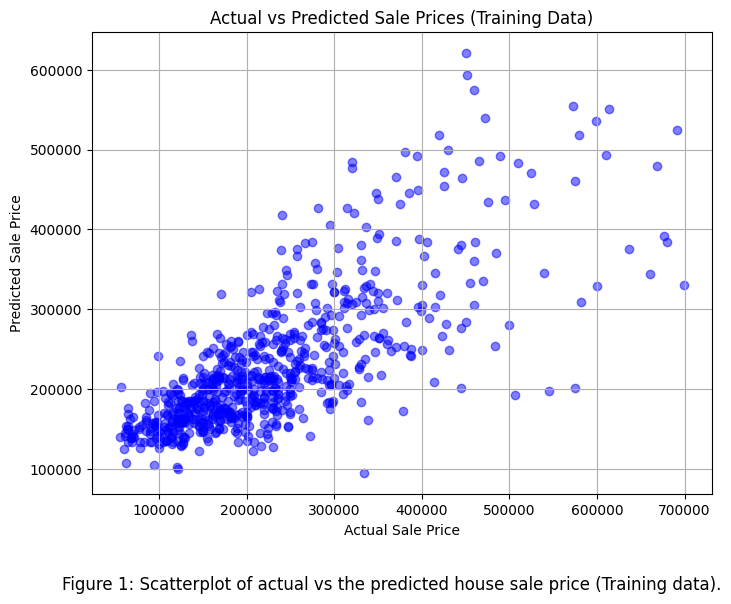

In [ ]:
#2.

import matplotlib.pyplot as plt

pred = model.predict(X_train)
test_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Sale Prices (Training Data)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
txt="Figure 1: Scatterplot of actual vs the predicted house sale price (Training data)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()




**Training data:**
The points are relatively close to the diagonal line, suggesting that the model's predictions closely match the actual sale prices in the training data. However, there are some points that deviate from the line, indicating instances of prediction errors.

There appear to be a few outliers where the predicted sale prices deviate significantly from the actual prices. These outliers represent instances where our model's predictions are less accurate.




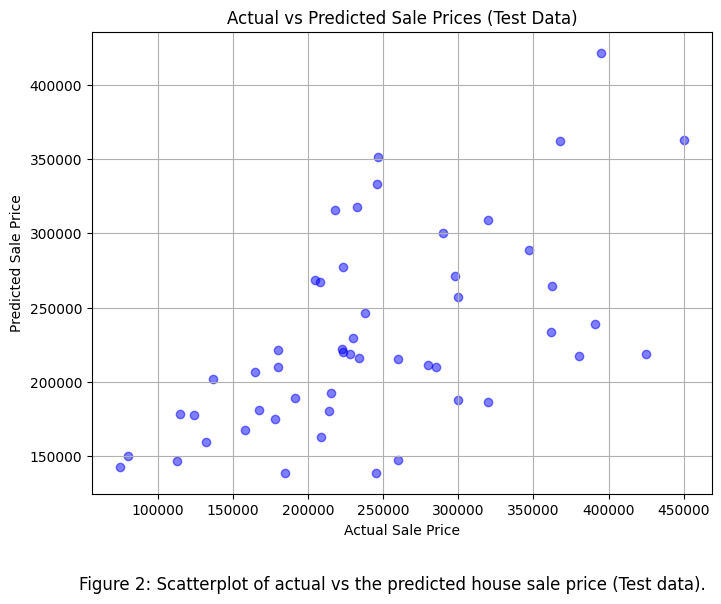

In [ ]:
test_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Sale Prices (Test Data)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
txt2="Figure 2: Scatterplot of actual vs the predicted house sale price (Test data)."
plt.figtext(0.5, -0.05, txt2, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

**Test data:** While there is some spread of points around the diagonal line, indicating some level of prediction error, it's not excessively scattered.

Again, there appear to be a few outliers, especially at the higher end of the price range.

But in general, the model is reasonably accurate in its predictions.

In [ ]:
#3.
test_data = [
    [846, 1],
    [1324, 2],
    [1150, 3],
    [3037, 4],
    [3984, 5]
]

X_test2 = [[house[0], house[1]] for house in test_data]  #extract x1 and x2
y_test_actual = [115000, 234500, 198000, 528000, 572500]  #actual prices
y_test_predicted = model.predict(X_test2)  #predicted sale prices


print("House\tActual Price\tPredicted Price")
for i, house in enumerate(test_data):
    print(f"{i+1}\t{y_test_actual[i]}\t\t{y_test_predicted[i]}")

mse_test = mean_squared_error(y_test_actual, y_test_predicted)                     #Calculate MSE on the test data
print("\nMean Squared Error on Test Data:", mse_test)


House	Actual Price	Predicted Price
1	115000		159494.06137452504
2	234500		212319.63637833242
3	198000		167512.61585719907
4	528000		431326.4226012541
5	572500		554381.579355364

Mean Squared Error on Test Data: 2615045670.7174797


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#4.
#calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

#calculate RMSE for test data we had initially (via the train-test split)
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

print("Root Mean Squared Error (RMSE) for Training Data:", rmse_train)
print("Root Mean Squared Error (RMSE) for Test Data:", rmse_test)


Root Mean Squared Error (RMSE) for Training Data: 74917.41134136484
Root Mean Squared Error (RMSE) for Test Data: 73956.1994995047


These values are relatively close to each other, indicating that the model has reasonable generalization ability.

In [ ]:
#calculate the RMSE for test data of task 3
rmse_test_task_3 = np.sqrt(mean_squared_error(y_test_actual, y_test_predicted))
print("Root Mean Squared Error (RMSE) for Training Data:", rmse_train)
print("Root Mean Squared Error (RMSE) for Test Data of task 3:", rmse_test_task_3)

Root Mean Squared Error (RMSE) for Training Data: 74917.41134136484
Root Mean Squared Error (RMSE) for Test Data of task 3: 51137.51725218462


But here the values of the RMSEs are not close, most possibly because we had only 5 test examples.  With only 5 test data points, the RMSE value can be highly influenced by outliers or noise in the data. The model's performance may not be accurately reflected by this small sample size. The RMSE we calculated above for the whole size of the test data is more representative of our case.

Moving on to defining the new model, our first job is to define the basis functions:

In [ ]:
#5.

#First step: Defining the basis functions.

def f1(x):
  return np.ones_like(x)                #f1(x) = 1

def f2(x):
  return x[:, 0]                       #f2(x) contains the area of the house

def f3(x):
  return np.maximum(x[:, 0] - 1.5, 0)       #f3(x) = max{x1 - 1.5, 0}

def f4(x):
  return x[:, 1]                        #f4(x) contains the number of bedrooms

def f5(x):
  return x[:, 2]                        #f5(x) -> 1 if condo , else 0

def f6(x):
    return np.where((x[:, 3] == 2), 1, 0)           #One-hot encoding (For location =2)

def f7(x):
    return np.where((x[:, 3] == 3), 1, 0)         #one-hot encoding (for location = 3)

def f8(x):
    return np.where((x[:, 3] == 4), 1, 0)        #one-hot encoding (for location = 4)

In [ ]:
def create_new_basis(X):
    return np.column_stack((
        f1(X), f2(X), f3(X), f4(X), f5(X), f6(X), f7(X), f8(X)
    ))

Now we are ready to apply our model to the new basis:

In [ ]:
y_new = 'selling price in 1000 dollars'

X2 = df1.iloc[:, [3, 1, 4, 0]].values  #our feature values
y2 = df1[y_new].values                 #the target value

X2_basis = create_new_basis(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_basis, y2, test_size=(1- 695/744), random_state=42)

 Let's fit now a Linear Regression model and calculate the corresponding Mean Squared Errors (*MSEs)*:

In [ ]:
#6.

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_train_pred = model2.predict(X2_train)    #predictions on the training set

y2_test_pred = model2.predict(X2_test)     #predictions on the test set

train_mse = mean_squared_error(y2_train, y2_train_pred)         #training MSE
test_mse = mean_squared_error(y2_test, y2_test_pred)            #test MSE

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MSE: 4719078196.250253
Testing MSE: 4688538895.74072


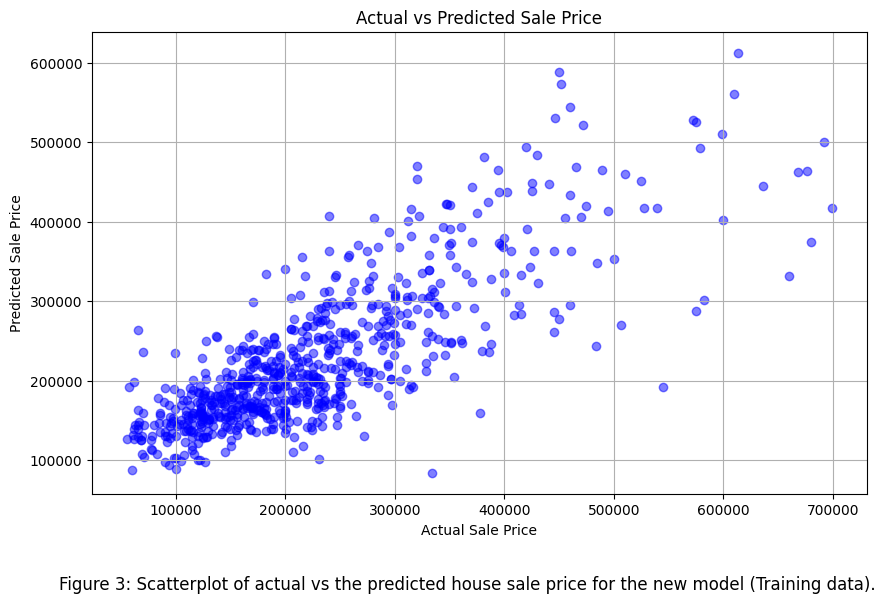

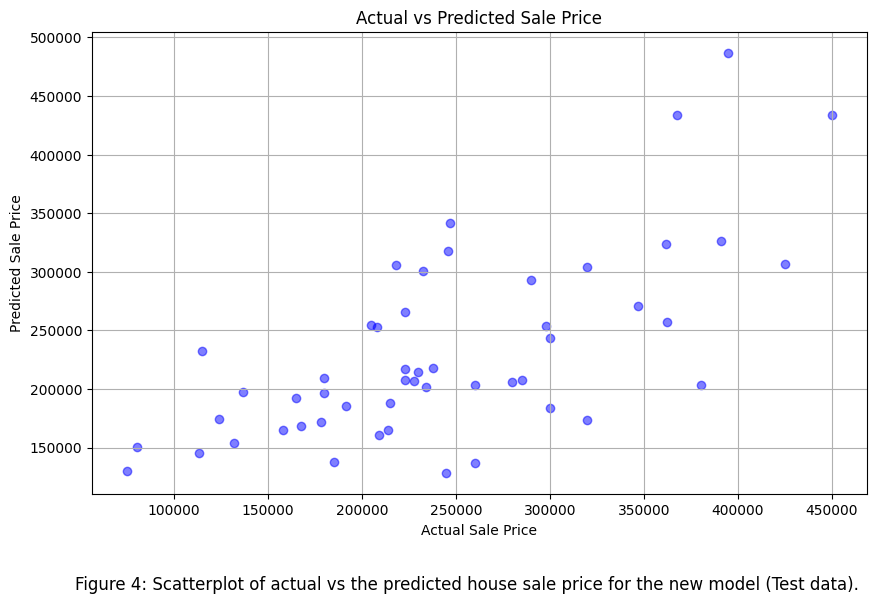

In [ ]:
#Scatterplots
plt.figure(figsize=(10, 6))
plt.scatter(y2_train, y2_train_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
txt="Figure 3: Scatterplot of actual vs the predicted house sale price for the new model (Training data)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_test_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
txt="Figure 4: Scatterplot of actual vs the predicted house sale price for the new model (Test data)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

More or less the same insights can be extracted from these two scatterplots with the ones from the previous model, so in order to get more accurate conclusions, we will calculate the Root Mean Square Error (*RMSE*).

In [ ]:
#calculate RMSE for training data
rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred))

#calculate RMSE for test data we had initially (via the train-test split)
rmse_test2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred))

print("Root Mean Squared Error (RMSE) for Training Data:", rmse_train2)
print("Root Mean Squared Error (RMSE) for Test Data:", rmse_test2)

Root Mean Squared Error (RMSE) for Training Data: 68695.54713553312
Root Mean Squared Error (RMSE) for Test Data: 68472.90628957354


Our new model achieves a lower *RMSE* for both training and test data than the previous one, indicating that changing the basis led to better results for our problem.

##**7. Cross-Validation.**
We will first apply the cross-validation method in our initial model:

In [ ]:
#7.
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

k = 10                       #number of folds (10)

rmse_scores = np.zeros(k)
kf = KFold(n_splits=k)                      #10-fold cross validation


for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]               #create the new x_train,x_test
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]               #create the new y_train, y_test


    model.fit(X_train, y_train)                                             #fitting the model


    y_pred = model.predict(X_test)                                          #predict on the test set

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))                     #calculate the RMSE
    rmse_scores[i] = rmse                                                  #store RMSE scores


avg_rmse = np.mean(rmse_scores)                                           #Average RMSE

print("Average RMSE after cross-validation (initial model):", avg_rmse)


Average RMSE after cross-validation (initial model): 71095.66743481465


This *RMSE* is smaller than the *RMSE* we got before doing the cross-validation. This indicates that the model's generalization ability is better assessed through cross-validation rather than using a single train-test split.

Now we will repeat this process for our second model:

In [ ]:
k = 10
rmse_scores2 = np.zeros(k)
kf = KFold(n_splits=k)

for i, (train_index, test_index) in enumerate(kf.split(X2_basis)):
    X_train, X_test = X2_basis[train_index], X2_basis[test_index]
    y_train, y_test = y2[train_index], y2[test_index]

    model2.fit(X_train, y_train)

    y_pred = model2.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_scores2[i] = rmse


avg_rmse2 = np.mean(rmse_scores2)

print("Average RMSE after cross-validation (new model):", avg_rmse2)


Average RMSE after cross-validation (new model): 66481.96602904817


The same goes here, we got a smaller *RMSE*, which proves again that cross-validation improves our model's generalization ability.